## ① .matファイルをcsvにする

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- ディレクトリを移動させてください

In [93]:
%cd /content/drive/MyDrive/world_model

/content/drive/MyDrive/world_model


In [96]:
!ls

data	       main.ipynb	    README.md  untitled.txt
edit_filename  process_data1.ipynb  temp


In [ ]:
import pandas as pd

In [ ]:
import scipy.io
GPS_Compass = scipy.io.loadmat('data/GPS_Long_Lat_Compass.mat')
CLC = scipy.io.loadmat('data/Cartesian_Location_Coordinates.mat')

In [ ]:
df = pd.DataFrame(columns = ["latitude", "longtitude", "compass_direction", "x", "y", "z"])

In [ ]:
N = len(GPS_Compass['GPS_Compass'])

a = [GPS_Compass['GPS_Compass'][i][0] for i in range(N)]
b = [GPS_Compass['GPS_Compass'][i][1] for i in range(N)]
c = [GPS_Compass['GPS_Compass'][i][2] for i in range(N)]
x = [CLC['XYZ_Cartesian'][i][0] for i in range(N)]
y = [CLC['XYZ_Cartesian'][i][1] for i in range(N)]
z = [CLC['XYZ_Cartesian'][i][2] for i in range(N)]

In [ ]:
df["latitude"] = a
df["longtitude"] = b
df["compass_direction"] = c
df["x"] = x
df["y"] = y
df["z"] = z

In [ ]:
data = df[3078:4402]
data = data.reset_index()
data = data.drop("index", axis=1)

In [ ]:
data.to_csv('data/meta.csv')

## ② Graph作成
- graphはmatplotを使いnodeを確認しつつ作成しました。
- 各辺の定義は以下の画像となります。

In [ ]:
# 連続していないnodeがあるため確認しながら辺を定義しました。
# colab上では動かないかもしれません
'''
使い方
左クリックで座標を合わせ、あったところのindexを返す

'''
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib

data = pd.read_csv('data/meta.csv', index_col=0)
N = 1324
latitude = list(data['latitude'])
longtitude = list(data['longtitude'])
plt.rcParams['font.size']=14

class SnaptoCursor(object):
    """
    十字カーソルを現在のカーソルのｘ値から最も近いxの点に飛ばす。
    """

    def __init__(self, ax, x, y):
        self.ax = ax
        self.lx = ax.axhline(color='g')  # the horiz line
        self.ly = ax.axvline(color='g')  # the vert line
        self.x = x
        self.y = y

        
    def mouse_move(self, event):
        if not event.inaxes:
                return
        if event.button == 1: #左クリック
            click_x, click_y = event.xdata, event.ydata
            click_zahyo = [click_x, click_y]
            min_dist = 10**18
            index = float('inf')
            
            for _index in range(N):
                data_zhayo = [self.x[_index], self.y[_index]]
                temp_dist = distance.euclidean(click_zahyo, data_zhayo)
                if min_dist >= temp_dist:
                    min_dist = temp_dist
                    index = _index
            
            x = self.x[index]
            y = self.y[index]
            self.lx.set_ydata(y)
            self.ly.set_xdata(x)
            self.ax.figure.canvas.draw()
            print(f'{index},')


fig,ax = plt.subplots(figsize=(8, 6))
ax.set_xlim([28.535, 28.5450])
ax.set_ylim([-81.3821, -81.374])
x, y = latitude, longtitude
[ax.plot(x[i], y[i], 'o', mew=1, mec='k', ms=5) for i in range(len(x))]
snap_cursor = SnaptoCursor(ax, x, y)
fig.canvas.mpl_connect('button_press_event' , snap_cursor.mouse_move)

Using matplotlib backend: agg


5

- 作成したグラフは以下のようになります

In [80]:
yoko0 = [1035, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 609, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 666, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]
yoko1 = [264, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519]
yoko2 = [1022, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 597, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 654, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 703, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 752, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 161, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 800, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 849, 1213, 1214, 1215, 1216, 1217, 258]
yoko3 = [1011, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 586, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 640, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 690, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 738, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 148, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 788, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 836, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 245, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420]
yoko4 = [520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 766, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
tate0 = [1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051]
tate1 = [520, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618]
tate2 = [536, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667]
tate3 = [546, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 1265]
tate4 = [553, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 1273]
tate5 = [0, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]
tate6 = [7, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806]
tate7 = [16, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222]
tate8 = [33, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321]
tate9 = [52, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 436, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907]
tate10 = [63, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 351, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 451, 948, 949, 950, 951, 952, 953, 954]
tate11 = [84, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 371, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 470, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001]

yoko = [yoko0, yoko1, yoko2, yoko3, yoko4]
tate = [tate0, tate1, tate2, tate3, tate4, tate5, tate6, tate7, tate8, tate9, tate10, tate11]

- グラフは横が5、縦が12個定義しました。
- 可視化したものが以下の図になります。

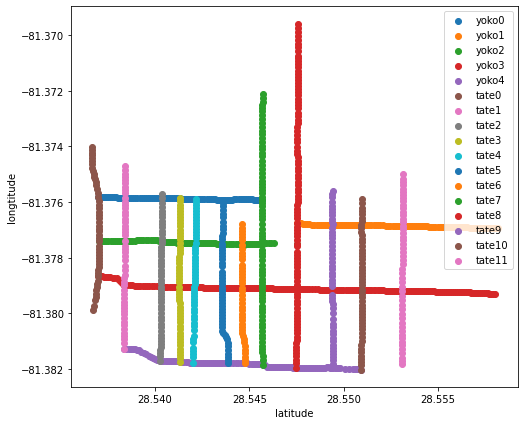

In [ ]:
%matplotlib inline

yoko_latitude = [[] for _ in range(len(yoko))]
yoko_longtitude = [[] for _ in range(len(yoko))]

for i in range(len(yoko)):
    for j in range(len(yoko[i])):
        temp_data = data.iloc[yoko[i][j]]
        latitude = temp_data['latitude']
        longtitude = temp_data['longtitude']
        yoko_latitude[i].append(latitude)
        yoko_longtitude[i].append(longtitude)

tate_latitude = [[] for _ in range(len(tate))]
tate_longtitude = [[] for _ in range(len(tate))]

for i in range(len(tate)):
    for j in range(len(tate[i])):
        temp_data = data.iloc[tate[i][j]]
        latitude = temp_data['latitude']
        longtitude = temp_data['longtitude']
        tate_latitude[i].append(latitude)
        tate_longtitude[i].append(longtitude)

plt.figure(figsize=(8, 7))
ax = plt.subplot(111, xlabel='latitude', ylabel='longtitude')
for i in range(len(yoko)):
    ax.scatter(yoko_latitude[i][:], yoko_longtitude[i][:], label=f"yoko{i}")
for i in range(len(tate)):
    ax.scatter(tate_latitude[i][:], tate_longtitude[i][:], label=f"tate{i}")

ax.legend()

## ③ グラフをtxtファイルとして入手する

In [ ]:
import os

path = 'data/graph.txt'
f = open(path, 'x')

def print_graph(data, direction_1, direction_2, file):
    n = len(data)
    for i in range(n-1):
        print(data[i], data[(i+1)], direction_1, file=f)
    for i in range(n):
        if i == 0:
            continue
        print(data[-i], data[-(i+1)], direction_2, file=f)

def get_graph_txt(yoko, tate, file):
    temp = []
    for i in range(len(yoko)):
        print_graph(yoko[i], 1, 3, file)
    for i in range(len(tate)):
        print_graph(tate[i], 0, 4, file)

get_graph_txt(yoko, tate, f)
f.close()

- グラフを読み込む(Nはnode数、Mは辺の数になっています。ここは手動でお願いします...)

In [ ]:
N, M = 1160, 2460
Graph = [[] for _ in range(1330)]

file_path = 'data/graph.txt'
with open(file_path) as f:
    lines = f.read()
    i = 0
    for line in lines.split("\n"):
        node1, node2, direction = map(int, line.split())
        Graph[node1].append((node2, direction))
        i += 1
        if i == M+1:
            break
f.close()

In [81]:
# このセルで確認できます。;を外してください
Graph;

## 行き止まり無しGraph

In [88]:
yoko0 = [1035, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 609, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 666, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]
yoko1 = [264, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470]
yoko2 = [1022, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 597, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 654, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 703, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 752, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 161, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 800, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 849]
yoko3 = [1011, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 586, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 640, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 690, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 738, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 148, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 788, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 836, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 245, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371]
yoko4 = [520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 766, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
tate0 = [1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035]
tate1 = [520, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609]
tate2 = [536, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666]
tate3 = [546, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 1265]
tate4 = [553, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 1273]
tate5 = [0, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]
tate6 = [7, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800]
tate7 = [16, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 193]
tate8 = [33, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264]
tate9 = [52, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 436]
tate10 = [63, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 351, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 451]
tate11 = [371, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 470]

yoko = [yoko0, yoko1, yoko2, yoko3, yoko4]
tate = [tate0, tate1, tate2, tate3, tate4, tate5, tate6, tate7, tate8, tate9, tate10, tate11]

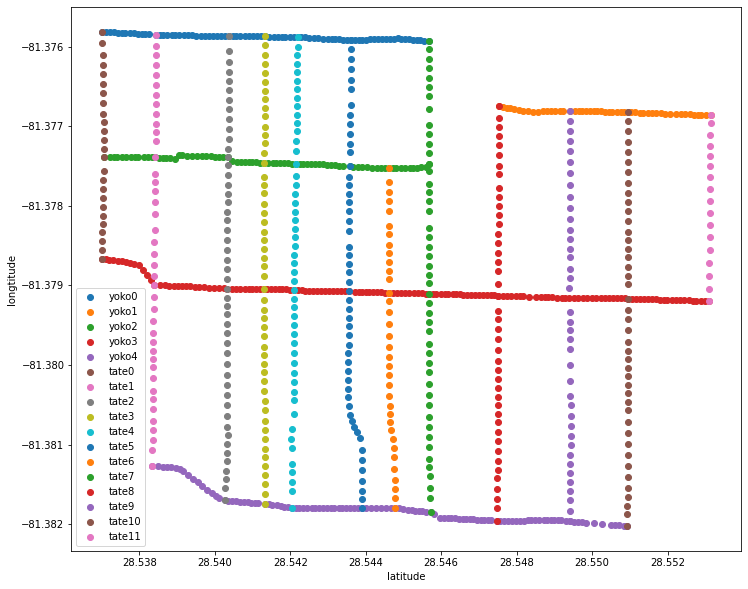

In [89]:
%matplotlib inline

yoko_latitude = [[] for _ in range(len(yoko))]
yoko_longtitude = [[] for _ in range(len(yoko))]

for i in range(len(yoko)):
    for j in range(len(yoko[i])):
        temp_data = data.iloc[yoko[i][j]]
        latitude = temp_data['latitude']
        longtitude = temp_data['longtitude']
        yoko_latitude[i].append(latitude)
        yoko_longtitude[i].append(longtitude)

tate_latitude = [[] for _ in range(len(tate))]
tate_longtitude = [[] for _ in range(len(tate))]

for i in range(len(tate)):
    for j in range(len(tate[i])):
        temp_data = data.iloc[tate[i][j]]
        latitude = temp_data['latitude']
        longtitude = temp_data['longtitude']
        tate_latitude[i].append(latitude)
        tate_longtitude[i].append(longtitude)

plt.figure(figsize=(12, 10))
ax = plt.subplot(111, xlabel='latitude', ylabel='longtitude')
for i in range(len(yoko)):
    ax.scatter(yoko_latitude[i][:], yoko_longtitude[i][:], label=f"yoko{i}")
for i in range(len(tate)):
    ax.scatter(tate_latitude[i][:], tate_longtitude[i][:], label=f"tate{i}")

ax.legend()

- Graph2.txtとして出力します

In [97]:
import os

path = 'data/graph_2.txt'
f = open(path, 'x')

def print_graph(data, direction_1, direction_2, file):
    n = len(data)
    for i in range(n-1):
        print(data[i], data[(i+1)], direction_1, file=f)
    for i in range(n):
        if i == 0:
            continue
        print(data[-i], data[-(i+1)], direction_2, file=f)

def get_graph_txt(yoko, tate, file):
    temp = []
    for i in range(len(yoko)):
        print_graph(yoko[i], 1, 3, file)
    for i in range(len(tate)):
        print_graph(tate[i], 0, 4, file)

get_graph_txt(yoko, tate, f)
f.close()

- Graph2.txtを入力する

In [106]:
N, M = 927, 1899
Graph_2 = [[] for _ in range(1330)]

file_path = 'data/graph_2.txt'
with open(file_path) as f:
    lines = f.read()
    i = 0
    for line in lines.split("\n"):
        node1, node2, direction = map(int, line.split())
        Graph_2[node1].append((node2, direction))
        i += 1
        if i == M+1:
            break
f.close()

In [107]:
Graph_2;

## ④ 現在の画像と進む方向を入力し、次の画像を返す関数の作成

In [ ]:
from PIL import Image

# データがあるディレクトリに移動します
os.chdir("data/interim")

In [ ]:
!pwd

/content/drive/MyDrive/world_model/data/interim


In [ ]:
!pip install JSAnimation

  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11424 sha256=71c586b8fcc41080080991a4b7e0a21403709626daee73887ab2bda433c6532a
  Stored in directory: /root/.cache/pip/wheels/0e/4e/3d/05fb8cca2646ee0bbfbce17c40a970f48d5e0698b9e5aaa91f
Successfully built JSAnimation


In [ ]:
from IPython import display
from JSAnimation.IPython_display import display_animation
from IPython.display import HTML

import matplotlib.animation as animation

In [ ]:
frames = []

def animate(i):
    patch.set_data(frames[i])

In [ ]:
def node_int_to_string(node):
    node = str(node)
    temp = len(node)
    fill = 6 - temp
    fill_text = "0" * fill
    node = fill_text + node
    return node

def return_image_and_moveable_node(image, action):
    """
    Graph
    input image(node), action
    return image, next_node, and moveable_direction

    """
    current_node = int(image[:6])
    moveable_nodes = Graph[current_node]
    next_node = float('inf')
    
    
    print(f"今のnodeは{current_node}で動ける箇所は{Graph[current_node]}")
    
    for i in moveable_nodes:
        if i[1] == action:
            next_node = i[0]
    
    
    
    next_image = node_int_to_string(next_node) + "_" + str(action) + ".jpg"
    _next_image = Image.open(next_image)
    
    # ここでappendしてます。外に書いたほうがいいかもしれません。
    frames.append(_next_image)
    next_moveable_nodes = Graph[next_node]
    
    return next_image, next_node, next_moveable_nodes

In [ ]:
next_image = "001035_0.jpg"

for i in range(10):
    next_image, next_node, next_moveable_nodes = return_image_and_moveable_node(next_image, 1)

patch = plt.imshow(frames[0])
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.